In [73]:
pip install matplotlib

Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Aditya Rakesh\AppData\Local\Temp\ipykernel_25428\701258718.py", line 143, in display_insights
    canvas.configure(scrollregion=canvas.bbox("all"))
    ^^^^^^^^^^^^^^^^
AttributeError: 'FigureCanvasTkAgg' object has no attribute 'configure'


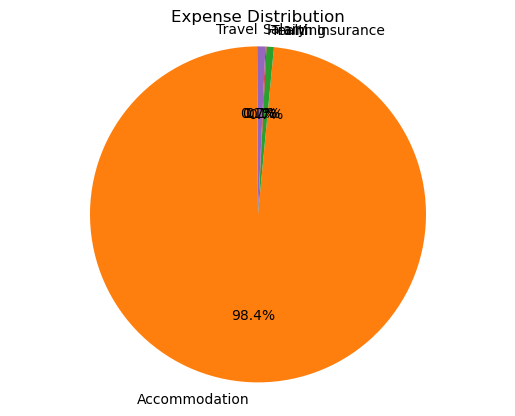

In [79]:
import tkinter as tk
from tkinter import messagebox, ttk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Function to save expenses
def save_expense():
    employee_id = employee_id_entry.get()
    travel_expense = travel_entry.get()
    accommodation_expense = accommodation_entry.get()
    training_expense = training_entry.get()
    health_insurance_expense = health_insurance_entry.get()
    salary = salary_entry.get()

    if employee_id.strip() == "":
        messagebox.showerror("Error", "Employee ID cannot be empty.")
        return

    try:
        travel_expense = float(travel_expense)
        accommodation_expense = float(accommodation_expense)
        training_expense = float(training_expense)
        health_insurance_expense = float(health_insurance_expense)
        salary = float(salary)
        if any(amount < 0 for amount in [travel_expense, accommodation_expense, training_expense, health_insurance_expense, salary]):
            raise ValueError("Expense amounts cannot be negative.")
        
        # Add or update entry in DataFrame
        expenses_df.loc[employee_id] = [travel_expense, accommodation_expense, training_expense, health_insurance_expense, salary]
        update_table()
        messagebox.showinfo("Success", "Expense saved successfully!")
    except ValueError as e:
        messagebox.showerror("Error", str(e))
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred while saving expense: {str(e)}")

# Function to update the table
def update_table():
    treeview.delete(*treeview.get_children())  # Clear existing rows
    for employee_id, expenses in expenses_df.iterrows():
        treeview.insert("", "end", values=[employee_id] + list(expenses))

# Function to display insights
# Function to display insights
def display_insights():
    total_expenses_category = expenses_df.sum()
    grand_total = total_expenses_category.sum()
    total_expenses_employee = expenses_df.sum(axis=1)
    average_expense_total = total_expenses_employee.mean()

    # Create a new window for insights
    insights_window = tk.Toplevel(root)
    insights_window.title("Expense Insights")

    # Create a frame for all content
    content_frame = ttk.Frame(insights_window)
    content_frame.pack(padx=20, pady=10, fill="both", expand=True)

    # Create a canvas within the frame
    canvas = tk.Canvas(content_frame)
    canvas.pack(side="left", fill="both", expand=True)

    # Add a scrollbar for the canvas
    scrollbar = ttk.Scrollbar(content_frame, orient="vertical", command=canvas.yview)
    scrollbar.pack(side="right", fill="y")
    canvas.configure(yscrollcommand=scrollbar.set)

    # Create another frame within the canvas to hold the content
    inner_frame = ttk.Frame(canvas)
    canvas.create_window((0, 0), window=inner_frame, anchor="nw")

    # Title for category expenses
    ttk.Label(inner_frame, text="Total Expenses by Category", font=("Helvetica", 14, "bold")).pack(pady=(0, 5), anchor="w")

    # Create Treeview for category expenses
    category_treeview = ttk.Treeview(inner_frame, columns=["Category", "Amount"], show="headings")
    category_treeview.pack(fill="both", expand=True)

    # Configure columns for category expenses
    category_treeview.heading("Category", text="Category")
    category_treeview.heading("Amount", text="Amount")

    # Insert data for category expenses
    for expense_type, expense_amount in total_expenses_category.items():
        category_treeview.insert("", "end", values=[expense_type, f"${expense_amount:.2f}"])

    # Insert grand total for category expenses
    category_treeview.insert("", "end", values=["Grand Total", f"${grand_total:.2f}"])

    # Title for pie chart
    ttk.Label(inner_frame, text="Expense Distribution", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Calculate percentage of expenses for each category
    percentages = (total_expenses_category / grand_total) * 100

    # Create pie chart
    fig, ax = plt.subplots()
    ax.pie(percentages, labels=total_expenses_category.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Expense Distribution')

    # Display pie chart
    canvas = FigureCanvasTkAgg(fig, master=inner_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    # Title for total expenses by employee
    ttk.Label(inner_frame, text="Total Expenses by Employee", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Create Treeview for total expenses by employee
    employee_treeview = ttk.Treeview(inner_frame, columns=["Employee ID", "Total Expense"], show="headings")
    employee_treeview.pack(fill="both", expand=True)

    # Configure columns for total expenses by employee
    employee_treeview.heading("Employee ID", text="Employee ID")
    employee_treeview.heading("Total Expense", text="Total Expense")

    # Insert data for total expenses by employee
    for employee_id, total_expense in total_expenses_employee.items():
        employee_treeview.insert("", "end", values=[employee_id, f"${total_expense:.2f}"])

    # Title for excessive spending section
    ttk.Label(inner_frame, text="Excessive Spending", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Create Treeview for excessive spending
    excessive_treeview = ttk.Treeview(inner_frame, columns=["Employee ID", "Total Expense"], show="headings")
    excessive_treeview.pack(fill="both", expand=True)

    # Configure columns for excessive spending
    excessive_treeview.heading("Employee ID", text="Employee ID")
    excessive_treeview.heading("Total Expense", text="Total Expense")

    # Insert data for excessive spending (e.g., employees with highest expenses)
    threshold = 2000  # Define the threshold for excessive spending
    excessive_spending = total_expenses_employee[total_expenses_employee > threshold]
    for employee_id, total_expense in excessive_spending.items():
        excessive_treeview.insert("", "end", values=[employee_id, f"${total_expense:.2f}"])

    # Update scroll region
    inner_frame.update_idletasks()
    canvas.configure(scrollregion=canvas.bbox("all"))

    insights_window.mainloop()


# Function to save DataFrame to Excel file
def save_to_excel():
    filename = tk.filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Excel files", "*.xlsx")])
    if filename:
        expenses_df.to_excel(filename, index=True)
        messagebox.showinfo("Success", f"Data saved to {filename}")

# Initialize expenses DataFrame
expenses_df = pd.DataFrame(columns=["Travel", "Accommodation", "Training", "Health Insurance", "Salary"])

# Create main window
root = tk.Tk()
root.title("Expense Tracker")

# Employee ID
employee_id_label = tk.Label(root, text="Employee ID:")
employee_id_label.grid(row=0, column=0)
employee_id_entry = tk.Entry(root)
employee_id_entry.grid(row=0, column=1)

# Travel expense
travel_label = tk.Label(root, text="Travel Expense:")
travel_label.grid(row=1, column=0)
travel_entry = tk.Entry(root)
travel_entry.grid(row=1, column=1)

# Accommodation expense
accommodation_label = tk.Label(root, text="Accommodation Expense:")
accommodation_label.grid(row=2, column=0)
accommodation_entry = tk.Entry(root)
accommodation_entry.grid(row=2, column=1)

# Training expense
training_label = tk.Label(root, text="Training Expense:")
training_label.grid(row=3, column=0)
training_entry = tk.Entry(root)
training_entry.grid(row=3, column=1)

# Health Insurance expense
health_insurance_label = tk.Label(root, text="Health Insurance Expense:")
health_insurance_label.grid(row=4, column=0)
health_insurance_entry = tk.Entry(root)
health_insurance_entry.grid(row=4, column=1)

# Salary
salary_label = tk.Label(root, text="Salary:")
salary_label.grid(row=5, column=0)
salary_entry = tk.Entry(root)
salary_entry.grid(row=5, column=1)

# Save button
save_button = tk.Button(root, text="Save Expense", command=save_expense)
save_button.grid(row=6, columnspan=2)

# Table
treeview = ttk.Treeview(root, columns=["Employee ID", "Travel", "Accommodation", "Training", "Health Insurance", "Salary"], show="headings")
treeview.grid(row=7, column=0, columnspan=2)

# Configure columns
for column in ["Employee ID", "Travel", "Accommodation", "Training", "Health Insurance", "Salary"]:
    treeview.heading(column, text=column)
    treeview.column(column, width=100)

# Insights button
insights_button = tk.Button(root, text="Insights", command=display_insights)
insights_button.grid(row=8, columnspan=2, pady=10)

# Save to Excel button
save_excel_button = tk.Button(root, text="Save to Excel", command=save_to_excel)
save_excel_button.grid(row=9, columnspan=2, pady=10)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Aditya Rakesh\AppData\Local\Temp\ipykernel_25428\414073834.py", line 145, in display_insights
    canvas.configure(scrollregion=canvas.bbox("all"))
    ^^^^^^^^^^^^^^^^
AttributeError: 'FigureCanvasTkAgg' object has no attribute 'configure'


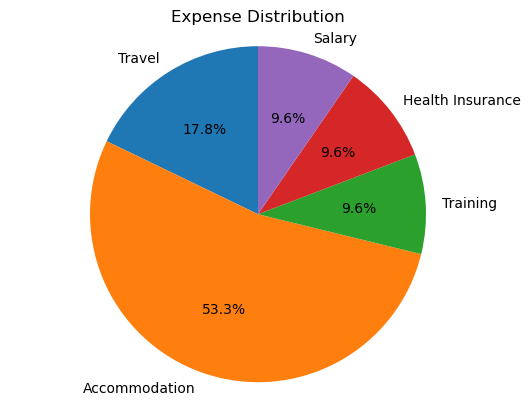

In [82]:
import tkinter as tk
from tkinter import messagebox, ttk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Function to save expenses
def save_expense():
    employee_id = employee_id_entry.get()
    travel_expense = travel_entry.get()
    accommodation_expense = accommodation_entry.get()
    training_expense = training_entry.get()
    health_insurance_expense = health_insurance_entry.get()
    salary = salary_entry.get()

    if employee_id.strip() == "":
        messagebox.showerror("Error", "Employee ID cannot be empty.")
        return

    try:
        travel_expense = float(travel_expense)
        accommodation_expense = float(accommodation_expense)
        training_expense = float(training_expense)
        health_insurance_expense = float(health_insurance_expense)
        salary = float(salary)
        if any(amount < 0 for amount in [travel_expense, accommodation_expense, training_expense, health_insurance_expense, salary]):
            raise ValueError("Expense amounts cannot be negative.")
        
        # Add or update entry in DataFrame
        expenses_df.loc[employee_id] = [travel_expense, accommodation_expense, training_expense, health_insurance_expense, salary]
        update_table()
        messagebox.showinfo("Success", "Expense saved successfully!")
    except ValueError as e:
        messagebox.showerror("Error", str(e))
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred while saving expense: {str(e)}")

# Function to update the table
def update_table():
    treeview.delete(*treeview.get_children())  # Clear existing rows
    for employee_id, expenses in expenses_df.iterrows():
        treeview.insert("", "end", values=[employee_id] + list(expenses))

# Function to display insights
# Function to display insights
def display_insights():
    total_expenses_category = expenses_df.sum()
    grand_total = total_expenses_category.sum()
    total_expenses_employee = expenses_df.sum(axis=1)
    average_expense_total = total_expenses_employee.mean()

    # Calculate excessive spending threshold
    excessive_threshold = 1.5 * average_expense_total

    # Create a new window for insights
    insights_window = tk.Toplevel(root)
    insights_window.title("Expense Insights")

    # Create a frame for all content
    content_frame = ttk.Frame(insights_window)
    content_frame.pack(padx=20, pady=10, fill="both", expand=True)

    # Create a canvas within the frame
    canvas = tk.Canvas(content_frame)
    canvas.pack(side="left", fill="both", expand=True)

    # Add a scrollbar for the canvas
    scrollbar = ttk.Scrollbar(content_frame, orient="vertical", command=canvas.yview)
    scrollbar.pack(side="right", fill="y")
    canvas.configure(yscrollcommand=scrollbar.set)

    # Create another frame within the canvas to hold the content
    inner_frame = ttk.Frame(canvas)
    canvas.create_window((0, 0), window=inner_frame, anchor="nw")

    # Title for category expenses
    ttk.Label(inner_frame, text="Total Expenses by Category", font=("Helvetica", 14, "bold")).pack(pady=(0, 5), anchor="w")

    # Create Treeview for category expenses
    category_treeview = ttk.Treeview(inner_frame, columns=["Category", "Amount"], show="headings")
    category_treeview.pack(fill="both", expand=True)

    # Configure columns for category expenses
    category_treeview.heading("Category", text="Category")
    category_treeview.heading("Amount", text="Amount")

    # Insert data for category expenses
    for expense_type, expense_amount in total_expenses_category.items():
        category_treeview.insert("", "end", values=[expense_type, f"${expense_amount:.2f}"])

    # Insert grand total for category expenses
    category_treeview.insert("", "end", values=["Grand Total", f"${grand_total:.2f}"])

    # Title for pie chart
    ttk.Label(inner_frame, text="Expense Distribution", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Calculate percentage of expenses for each category
    percentages = (total_expenses_category / grand_total) * 100

    # Create pie chart
    fig, ax = plt.subplots()
    ax.pie(percentages, labels=total_expenses_category.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Expense Distribution')

    # Display pie chart
    canvas = FigureCanvasTkAgg(fig, master=inner_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    # Title for total expenses by employee
    ttk.Label(inner_frame, text="Total Expenses by Employee", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Create Treeview for total expenses by employee
    employee_treeview = ttk.Treeview(inner_frame, columns=["Employee ID", "Total Expense"], show="headings")
    employee_treeview.pack(fill="both", expand=True)

    # Configure columns for total expenses by employee
    employee_treeview.heading("Employee ID", text="Employee ID")
    employee_treeview.heading("Total Expense", text="Total Expense")

    # Insert data for total expenses by employee
    for employee_id, total_expense in total_expenses_employee.items():
        employee_treeview.insert("", "end", values=[employee_id, f"${total_expense:.2f}"])

    # Title for excessive spending section
    ttk.Label(inner_frame, text="Excessive Spending", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Create Treeview for excessive spending
    excessive_treeview = ttk.Treeview(inner_frame, columns=["Employee ID", "Total Expense"], show="headings")
    excessive_treeview.pack(fill="both", expand=True)

    # Configure columns for excessive spending
    excessive_treeview.heading("Employee ID", text="Employee ID")
    excessive_treeview.heading("Total Expense", text="Total Expense")

    # Insert data for excessive spending (e.g., employees with highest expenses)
    excessive_spending = total_expenses_employee[total_expenses_employee > excessive_threshold]
    for employee_id, total_expense in excessive_spending.items():
        excessive_treeview.insert("", "end", values=[employee_id, f"${total_expense:.2f}"])

    # Update scroll region
    inner_frame.update_idletasks()
    canvas.configure(scrollregion=canvas.bbox("all"))

    insights_window.mainloop()

# Function to save DataFrame to Excel file
def save_to_excel():
    filename = tk.filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Excel files", "*.xlsx")])
    if filename:
        expenses_df.to_excel(filename, index=True)
        messagebox.showinfo("Success", f"Data saved to {filename}")

# Initialize expenses DataFrame
expenses_df = pd.DataFrame(columns=["Travel", "Accommodation", "Training", "Health Insurance", "Salary"])

# Create main window
root = tk.Tk()
root.title("Expense Tracker")

# Employee ID
employee_id_label = tk.Label(root, text="Employee ID:")
employee_id_label.grid(row=0, column=0)
employee_id_entry = tk.Entry(root)
employee_id_entry.grid(row=0, column=1)

# Travel expense
travel_label = tk.Label(root, text="Travel Expense:")
travel_label.grid(row=1, column=0)
travel_entry = tk.Entry(root)
travel_entry.grid(row=1, column=1)

# Accommodation expense
accommodation_label = tk.Label(root, text="Accommodation Expense:")
accommodation_label.grid(row=2, column=0)
accommodation_entry = tk.Entry(root)
accommodation_entry.grid(row=2, column=1)

# Training expense
training_label = tk.Label(root, text="Training Expense:")
training_label.grid(row=3, column=0)
training_entry = tk.Entry(root)
training_entry.grid(row=3, column=1)

# Health Insurance expense
health_insurance_label = tk.Label(root, text="Health Insurance Expense:")
health_insurance_label.grid(row=4, column=0)
health_insurance_entry = tk.Entry(root)
health_insurance_entry.grid(row=4, column=1)

# Salary
salary_label = tk.Label(root, text="Salary:")
salary_label.grid(row=5, column=0)
salary_entry = tk.Entry(root)
salary_entry.grid(row=5, column=1)

# Save button
save_button = tk.Button(root, text="Save Expense", command=save_expense)
save_button.grid(row=6, columnspan=2)

# Table
treeview = ttk.Treeview(root, columns=["Employee ID", "Travel", "Accommodation", "Training", "Health Insurance", "Salary"], show="headings")
treeview.grid(row=7, column=0, columnspan=2)

# Configure columns
for column in ["Employee ID", "Travel", "Accommodation", "Training", "Health Insurance", "Salary"]:
    treeview.heading(column, text=column)
    treeview.column(column, width=100)

# Insights button
insights_button = tk.Button(root, text="Insights", command=display_insights)
insights_button.grid(row=8, columnspan=2, pady=10)

# Save to Excel button
save_excel_button = tk.Button(root, text="Save to Excel", command=save_to_excel)
save_excel_button.grid(row=9, columnspan=2, pady=10)

root.mainloop()


In [84]:
import tkinter as tk
from tkinter import messagebox, ttk, filedialog
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns

# Function to save expenses
def save_expense():
    employee_id = employee_id_entry.get()
    travel_expense = travel_entry.get()
    accommodation_expense = accommodation_entry.get()
    training_expense = training_entry.get()
    health_insurance_expense = health_insurance_entry.get()
    salary = salary_entry.get()
    budget = budget_entry.get()  # Get budget from entry field

    if employee_id.strip() == "":
        messagebox.showerror("Error", "Employee ID cannot be empty.")
        return

    try:
        # Convert expenses to float
        travel_expense = float(travel_expense)
        accommodation_expense = float(accommodation_expense)
        training_expense = float(training_expense)
        health_insurance_expense = float(health_insurance_expense)
        salary = float(salary)
        budget = float(budget)  # Convert budget to float

        if any(amount < 0 for amount in [travel_expense, accommodation_expense, training_expense, health_insurance_expense, salary, budget]):
            raise ValueError("Amounts cannot be negative.")
        
        # Add or update entry in DataFrame
        expenses_df.loc[employee_id] = [travel_expense, accommodation_expense, training_expense, health_insurance_expense, salary, budget]
        update_table()
        messagebox.showinfo("Success", "Expense saved successfully!")
    except ValueError as e:
        messagebox.showerror("Error", str(e))
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred while saving expense: {str(e)}")

# Function to update the table
def update_table():
    treeview.delete(*treeview.get_children())  # Clear existing rows
    for employee_id, expenses in expenses_df.iterrows():
        treeview.insert("", "end", values=[employee_id] + list(expenses))

# Function to display insights
def display_insights():
    total_expenses_category = expenses_df.iloc[:, :5].sum()  # Exclude budget column from sum
    grand_total = total_expenses_category.sum()
    total_expenses_employee = expenses_df.iloc[:, :5].sum(axis=1)
    average_expense_total = total_expenses_employee.mean()

    # Calculate excessive spending threshold
    excessive_threshold = 1.5 * average_expense_total

    # Get budget sum
    budget_sum = expenses_df['Budget'].sum()

    # Create a new window for insights
    insights_window = tk.Toplevel(root)
    insights_window.title("Expense Insights")

    # Create a frame for all content
    content_frame = ttk.Frame(insights_window)
    content_frame.pack(padx=20, pady=10, fill="both", expand=True)

    # Create a canvas within the frame
    canvas = tk.Canvas(content_frame)
    canvas.pack(side="left", fill="both", expand=True)

    # Add a scrollbar for the canvas
    scrollbar = ttk.Scrollbar(content_frame, orient="vertical", command=canvas.yview)
    scrollbar.pack(side="right", fill="y")
    canvas.configure(yscrollcommand=scrollbar.set)

    # Create another frame within the canvas to hold the content
    inner_frame = ttk.Frame(canvas)
    canvas.create_window((0, 0), window=inner_frame, anchor="nw")

    # Title for category expenses
    ttk.Label(inner_frame, text="Total Expenses by Category", font=("Helvetica", 14, "bold")).pack(pady=(0, 5), anchor="w")

    # Create Treeview for category expenses
    category_treeview = ttk.Treeview(inner_frame, columns=["Category", "Amount"], show="headings")
    category_treeview.pack(fill="both", expand=True)

    # Configure columns for category expenses
    category_treeview.heading("Category", text="Category")
    category_treeview.heading("Amount", text="Amount")

    # Insert data for category expenses
    for expense_type, expense_amount in total_expenses_category.items():
        category_treeview.insert("", "end", values=[expense_type, f"${expense_amount:.2f}"])

    # Insert grand total for category expenses
    category_treeview.insert("", "end", values=["Grand Total", f"${grand_total:.2f}"])

    # Check if total expenses exceed budget
    if grand_total > budget_sum:
        exceed_message = f"Expenses exceed the budget by ${grand_total - budget_sum:.2f}"
    else:
        exceed_message = "Expenses are within the budget"

    # Display budget information
    ttk.Label(inner_frame, text=f"Budget: ${budget_sum:.2f}").pack(pady=(10, 5), anchor="w")
    ttk.Label(inner_frame, text=exceed_message).pack(pady=(0, 5), anchor="w")

    # Title for pie chart
    ttk.Label(inner_frame, text="Expense Distribution", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Calculate percentage of expenses for each category
    percentages = (total_expenses_category / grand_total) * 100

    # Create pie chart
    fig, ax = plt.subplots()
    ax.pie(percentages, labels=total_expenses_category.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Expense Distribution')

    # Display pie chart
    canvas = FigureCanvasTkAgg(fig, master=inner_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    # Title for total expenses by employee
    ttk.Label(inner_frame, text="Total Expenses by Employee", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Create Treeview for total expenses by employee
    employee_treeview = ttk.Treeview(inner_frame, columns=["Employee ID", "Total Expense"], show="headings")
    employee_treeview.pack(fill="both", expand=True)

    # Configure columns for total expenses by employee
    employee_treeview.heading("Employee ID", text="Employee ID")
    employee_treeview.heading("Total Expense", text="Total Expense")

    # Insert data for total expenses by employee
    for employee_id, total_expense in total_expenses_employee.items():
        employee_treeview.insert("", "end", values=[employee_id, f"${total_expense:.2f}"])

    # Title for excessive spending section
    ttk.Label(inner_frame, text="Excessive Spending", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Create Treeview for excessive spending
    excessive_treeview = ttk.Treeview(inner_frame, columns=["Employee ID", "Total Expense"], show="headings")
    excessive_treeview.pack(fill="both", expand=True)

    # Configure columns for excessive spending
    excessive_treeview.heading("Employee ID", text="Employee ID")
    excessive_treeview.heading("Total Expense", text="Total Expense")

    # Insert data for excessive spending (e.g., employees with highest expenses)
    excessive_spending = total_expenses_employee[total_expenses_employee > excessive_threshold]
    for employee_id, total_expense in excessive_spending.items():
        excessive_treeview.insert("", "end", values=[employee_id, f"${total_expense:.2f}"])

    # Update scroll region
    inner_frame.update_idletasks()
    canvas.configure(scrollregion=canvas.bbox("all"))

    insights_window.mainloop()

# Function to save DataFrame to Excel file
def save_to_excel():
    filename = filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Excel files", "*.xlsx")])
    if filename:
        expenses_df.to_excel(filename, index=True)
        messagebox.showinfo("Success", f"Data saved to {filename}")

# Initialize expenses DataFrame
expenses_df = pd.DataFrame(columns=["Travel", "Accommodation", "Training", "Health Insurance", "Salary", "Budget"])

# Create main window
root = tk.Tk()
root.title("Expense Tracker")

# Employee ID
employee_id_label = tk.Label(root, text="Employee ID:")
employee_id_label.grid(row=0, column=0)
employee_id_entry = tk.Entry(root)
employee_id_entry.grid(row=0, column=1)

# Travel expense
travel_label = tk.Label(root, text="Travel Expense:")
travel_label.grid(row=1, column=0)
travel_entry = tk.Entry(root)
travel_entry.grid(row=1, column=1)

# Accommodation expense
accommodation_label = tk.Label(root, text="Accommodation Expense:")
accommodation_label.grid(row=2, column=0)
accommodation_entry = tk.Entry(root)
accommodation_entry.grid(row=2, column=1)

# Training expense
training_label = tk.Label(root, text="Training Expense:")
training_label.grid(row=3, column=0)
training_entry = tk.Entry(root)
training_entry.grid(row=3, column=1)

# Health Insurance expense
health_insurance_label = tk.Label(root, text="Health Insurance Expense:")
health_insurance_label.grid(row=4, column=0)
health_insurance_entry = tk.Entry(root)
health_insurance_entry.grid(row=4, column=1)

# Salary
salary_label = tk.Label(root, text="Salary:")
salary_label.grid(row=5, column=0)
salary_entry = tk.Entry(root)
salary_entry.grid(row=5, column=1)

# Budget
budget_label = tk.Label(root, text="Budget:")
budget_label.grid(row=6, column=0)
budget_entry = tk.Entry(root)
budget_entry.grid(row=6, column=1)

# Save button
save_button = tk.Button(root, text="Save Expense", command=save_expense)
save_button.grid(row=7, columnspan=2)

# Table
treeview = ttk.Treeview(root, columns=["Employee ID", "Travel", "Accommodation", "Training", "Health Insurance", "Salary", "Budget"], show="headings")
treeview.grid(row=8, column=0, columnspan=2)

# Configure columns
for column in ["Employee ID", "Travel", "Accommodation", "Training", "Health Insurance", "Salary", "Budget"]:
    treeview.heading(column, text=column)
    treeview.column(column, width=100)

# Insights button
insights_button = tk.Button(root, text="Insights", command=display_insights)
insights_button.grid(row=9, columnspan=2, pady=10)

# Save to Excel button
save_excel_button = tk.Button(root, text="Save to Excel", command=save_to_excel)
save_excel_button.grid(row=10, columnspan=2, pady=10)

root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import messagebox, ttk, filedialog
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns

# Function to save expenses
def save_expense():
    employee_id = employee_id_entry.get()
    travel_expense = travel_entry.get()
    accommodation_expense = accommodation_entry.get()
    training_expense = training_entry.get()
    health_insurance_expense = health_insurance_entry.get()
    salary = salary_entry.get()

    if employee_id.strip() == "":
        messagebox.showerror("Error", "Employee ID cannot be empty.")
        return

    try:
        # Convert expenses to float
        travel_expense = float(travel_expense)
        accommodation_expense = float(accommodation_expense)
        training_expense = float(training_expense)
        health_insurance_expense = float(health_insurance_expense)
        salary = float(salary)

        if any(amount < 0 for amount in [travel_expense, accommodation_expense, training_expense, health_insurance_expense, salary]):
            raise ValueError("Amounts cannot be negative.")
        
        # Add or update entry in DataFrame
        expenses_df.loc[employee_id] = [travel_expense, accommodation_expense, training_expense, health_insurance_expense, salary]
        update_table()
        messagebox.showinfo("Success", "Expense saved successfully!")
    except ValueError as e:
        messagebox.showerror("Error", str(e))
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred while saving expense: {str(e)}")

# Function to update the table
def update_table():
    treeview.delete(*treeview.get_children())  # Clear existing rows
    for employee_id, expenses in expenses_df.iterrows():
        treeview.insert("", "end", values=[employee_id] + list(expenses)[:5])  # Exclude budget from display

# Function to display insights
def display_insights():
    total_expenses_category = expenses_df.iloc[:, :5].sum()  # Exclude budget column from sum
    grand_total = total_expenses_category.sum()
    total_expenses_employee = expenses_df.iloc[:, :5].sum(axis=1)
    average_expense_total = total_expenses_employee.mean()

    # Calculate excessive spending threshold
    excessive_threshold = 1.5 * average_expense_total

    # Get total budget
    total_budget = budget_entry.get()
    try:
        total_budget = float(total_budget)
    except ValueError:
        messagebox.showerror("Error", "Invalid budget value. Please enter a valid number.")
        return

    # Create a new window for insights
    insights_window = tk.Toplevel(root)
    insights_window.title("Expense Insights")

    # Create a frame for all content
    content_frame = ttk.Frame(insights_window)
    content_frame.pack(padx=20, pady=10, fill="both", expand=True)

    # Create a canvas within the frame
    canvas = tk.Canvas(content_frame)
    canvas.pack(side="left", fill="both", expand=True)

    # Add a scrollbar for the canvas
    scrollbar = ttk.Scrollbar(content_frame, orient="vertical", command=canvas.yview)
    scrollbar.pack(side="right", fill="y")
    canvas.configure(yscrollcommand=scrollbar.set)

    # Create another frame within the canvas to hold the content
    inner_frame = ttk.Frame(canvas)
    canvas.create_window((0, 0), window=inner_frame, anchor="nw")

    # Title for category expenses
    ttk.Label(inner_frame, text="Total Expenses by Category", font=("Helvetica", 14, "bold")).pack(pady=(0, 5), anchor="w")

    # Create Treeview for category expenses
    category_treeview = ttk.Treeview(inner_frame, columns=["Category", "Amount"], show="headings")
    category_treeview.pack(fill="both", expand=True)

    # Configure columns for category expenses
    category_treeview.heading("Category", text="Category")
    category_treeview.heading("Amount", text="Amount")

    # Insert data for category expenses
    for expense_type, expense_amount in total_expenses_category.items():
        category_treeview.insert("", "end", values=[expense_type, f"${expense_amount:.2f}"])

    # Insert grand total for category expenses
    category_treeview.insert("", "end", values=["Grand Total", f"${grand_total:.2f}"])

    # Check if total expenses exceed budget
    if grand_total > total_budget:
        exceed_message = f"Expenses exceed the budget by ${grand_total - total_budget:.2f}"
    else:
        exceed_message = "Expenses are within the budget"

    # Display budget information
    ttk.Label(inner_frame, text=f"Total Budget: ${total_budget:.2f}").pack(pady=(10, 5), anchor="w")
    ttk.Label(inner_frame, text=exceed_message).pack(pady=(0, 5), anchor="w")

    # Title for pie chart
    ttk.Label(inner_frame, text="Expense Distribution", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Calculate percentage of expenses for each category
    percentages = (total_expenses_category / grand_total) * 100

    # Create pie chart
    fig, ax = plt.subplots()
    ax.pie(percentages, labels=total_expenses_category.index, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title('Expense Distribution')

    # Display pie chart
    canvas = FigureCanvasTkAgg(fig, master=inner_frame)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    # Title for total expenses by employee
    ttk.Label(inner_frame, text="Total Expenses by Employee", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Create Treeview for total expenses by employee
    employee_treeview = ttk.Treeview(inner_frame, columns=["Employee ID", "Total Expense"], show="headings")
    employee_treeview.pack(fill="both", expand=True)

    # Configure columns for total expenses by employee
    employee_treeview.heading("Employee ID", text="Employee ID")
    employee_treeview.heading("Total Expense", text="Total Expense")

    # Insert data for total expenses by employee
    for employee_id, total_expense in total_expenses_employee.items():
        employee_treeview.insert("", "end", values=[employee_id, f"${total_expense:.2f}"])

    # Title for excessive spending section
    ttk.Label(inner_frame, text="Excessive Spending", font=("Helvetica", 14, "bold")).pack(pady=(10, 5), anchor="w")

    # Create Treeview for excessive spending
    excessive_treeview = ttk.Treeview(inner_frame, columns=["Employee ID", "Total Expense"], show="headings")
    excessive_treeview.pack(fill="both", expand=True)

    # Configure columns for excessive spending
    excessive_treeview.heading("Employee ID", text="Employee ID")
    excessive_treeview.heading("Total Expense", text="Total Expense")

    # Insert data for excessive spending (e.g., employees with highest expenses)
    excessive_spending = total_expenses_employee[total_expenses_employee > excessive_threshold]
    for employee_id, total_expense in excessive_spending.items():
        excessive_treeview.insert("", "end", values=[employee_id, f"${total_expense:.2f}"])

    # Update scroll region
    inner_frame.update_idletasks()
    canvas.configure(scrollregion=canvas.bbox("all"))

    insights_window.mainloop()

# Function to save DataFrame to Excel file
def save_to_excel():
    filename = filedialog.asksaveasfilename(defaultextension=".xlsx", filetypes=[("Excel files", "*.xlsx")])
    if filename:
        expenses_df.to_excel(filename, index=True)
        messagebox.showinfo("Success", f"Data saved to {filename}")

# Initialize expenses DataFrame
expenses_df = pd.DataFrame(columns=["Travel", "Accommodation", "Training", "Health Insurance", "Salary"])

# Create main window
root = tk.Tk()
root.title("Expense Tracker")

# Employee ID
employee_id_label = tk.Label(root, text="Employee ID:")
employee_id_label.grid(row=0, column=0)
employee_id_entry = tk.Entry(root)
employee_id_entry.grid(row=0, column=1)

# Travel expense
travel_label = tk.Label(root, text="Travel Expense:")
travel_label.grid(row=1, column=0)
travel_entry = tk.Entry(root)
travel_entry.grid(row=1, column=1)

# Accommodation expense
accommodation_label = tk.Label(root, text="Accommodation Expense:")
accommodation_label.grid(row=2, column=0)
accommodation_entry = tk.Entry(root)
accommodation_entry.grid(row=2, column=1)

# Training expense
training_label = tk.Label(root, text="Training Expense:")
training_label.grid(row=3, column=0)
training_entry = tk.Entry(root)
training_entry.grid(row=3, column=1)

# Health Insurance expense
health_insurance_label = tk.Label(root, text="Health Insurance Expense:")
health_insurance_label.grid(row=4, column=0)
health_insurance_entry = tk.Entry(root)
health_insurance_entry.grid(row=4, column=1)

# Salary
salary_label = tk.Label(root, text="Salary:")
salary_label.grid(row=5, column=0)
salary_entry = tk.Entry(root)
salary_entry.grid(row=5, column=1)

# Budget
budget_label = tk.Label(root, text="Total Budget:")
budget_label.grid(row=6, column=0)
budget_entry = tk.Entry(root)
budget_entry.grid(row=6, column=1)

# Save button
save_button = tk.Button(root, text="Save Expense", command=save_expense)
save_button.grid(row=7, columnspan=2)

# Table
treeview = ttk.Treeview(root, columns=["Employee ID", "Travel", "Accommodation", "Training", "Health Insurance", "Salary"], show="headings")
treeview.grid(row=8, column=0, columnspan=2)

# Configure columns
for column in ["Employee ID", "Travel", "Accommodation", "Training", "Health Insurance", "Salary"]:
    treeview.heading(column, text=column)
    treeview.column(column, width=100)

# Insights button
insights_button = tk.Button(root, text="Insights", command=display_insights)
insights_button.grid(row=9, columnspan=2, pady=10)

# Save to Excel button
save_excel_button = tk.Button(root, text="Save to Excel", command=save_to_excel)
save_excel_button.grid(row=10, columnspan=2, pady=10)

root.mainloop()


Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Aditya Rakesh\AppData\Local\Temp\ipykernel_25428\1700886425.py", line 164, in display_insights
    canvas.configure(scrollregion=canvas.bbox("all"))
    ^^^^^^^^^^^^^^^^
AttributeError: 'FigureCanvasTkAgg' object has no attribute 'configure'
Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Aditya Rakesh\AppData\Local\Temp\ipykernel_25428\1700886425.py", line 164, in display_insights
    canvas.configure(scrollregion=canvas.bbox("all"))
    ^^^^^^^^^^^^^^^^
AttributeError: 'FigureCanvasTkAgg' object has no attribute 'configure'
